UTKFace dataset is a large-scale face dataset consisting of over 20,000 images. The images cover a wide range of ages and races and include both males and females. Using this dataset, I will be attempting to create a CNN model to predict the age and gender of an individual.

Import libraries

In [1]:
import os, shutil
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the dataset

In [2]:
folder = '../input/utkface-new/UTKFace'
files = os.listdir(folder)
total_files = len(files)
print('Number of images:', total_files)
print(files[0])

Number of images: 23708
26_0_2_20170104023102422.jpg.chip.jpg


In [3]:
df = pd.DataFrame(files, columns = ['file_name'])
df['file_path'] = df.apply(lambda x : os.path.join(folder, x['file_name']), axis = 1)
df['age'] = df.apply(lambda x : x['file_name'].split('_')[0], axis = 1).astype('float')
df['gender'] = df.apply(lambda x : x['file_name'].split('_')[1], axis = 1).astype('int')
df.sample(10)

,file_name,file_path,age,gender
12537,4_0_2_20170110220021011.jpg.chip.jpg,../input/utkface-new/UTKFace/4_0_2_20170110220...,4.0,0
8173,28_1_1_20170103225945785.jpg.chip.jpg,../input/utkface-new/UTKFace/28_1_1_2017010322...,28.0,1
23078,45_0_3_20170119183849743.jpg.chip.jpg,../input/utkface-new/UTKFace/45_0_3_2017011918...,45.0,0
1623,33_0_3_20170117154355516.jpg.chip.jpg,../input/utkface-new/UTKFace/33_0_3_2017011715...,33.0,0
20113,35_1_1_20170113010415255.jpg.chip.jpg,../input/utkface-new/UTKFace/35_1_1_2017011301...,35.0,1
15637,25_0_3_20170119152752375.jpg.chip.jpg,../input/utkface-new/UTKFace/25_0_3_2017011915...,25.0,0
12973,62_0_0_20170120134041527.jpg.chip.jpg,../input/utkface-new/UTKFace/62_0_0_2017012013...,62.0,0
19070,70_0_0_20170111205843899.jpg.chip.jpg,../input/utkface-new/UTKFace/70_0_0_2017011120...,70.0,0
14424,23_0_0_20170117144517953.jpg.chip.jpg,../input/utkface-new/UTKFace/23_0_0_2017011714...,23.0,0
17018,80_0_0_20170111211628015.jpg.chip.jpg,../input/utkface-new/UTKFace/80_0_0_2017011121...,80.0,0


In [22]:
df.to_csv('mycsvfile.csv',index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  23708 non-null  object 
 1   file_path  23708 non-null  object 
 2   age        23708 non-null  float64
 3   gender     23708 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 741.0+ KB


Visualize and Prepare Data

Text(0, 0.5, 'count')

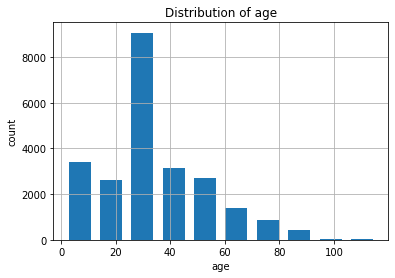

In [5]:
df['age'].hist(rwidth=0.7)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

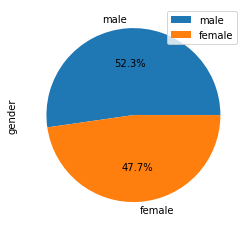

In [6]:
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['male' , 'female'])
plt.legend()

In [13]:
df.head(1)

,file_name,file_path,age,gender
0,26_0_2_20170104023102422.jpg.chip.jpg,../input/utkface-new/UTKFace/26_0_2_2017010402...,26.0,0


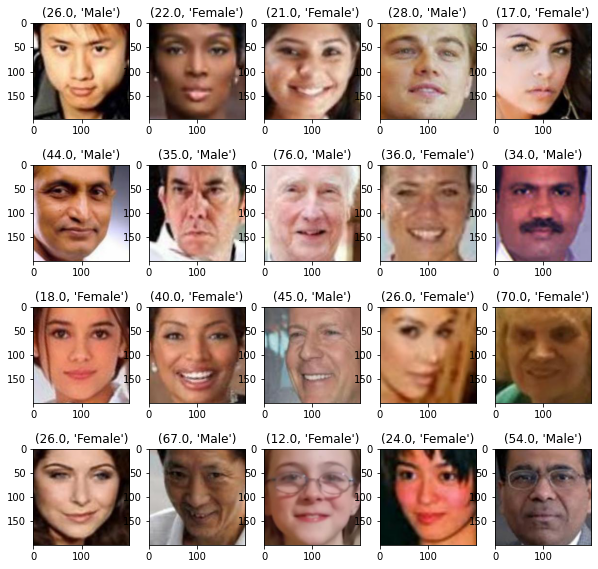

In [14]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(4,5,i+1)
    file = df['file_path'][i]
    image = imread(file)
    plt.imshow(image)
    plt.title((df['age'][i], 'Male' if df['gender'][i] == 0 else 'Female'))

In [15]:
from sklearn.model_selection import train_test_split

training_data, validation_data = train_test_split(df, test_size=0.2)

n_train = len(training_data)
n_val = len(validation_data)

print('No. of training image:', n_train)
print('No. of validation image:', n_val)

No. of training image: 18966
No. of validation image: 4742


In [9]:
validation_data

,file_name,file_path,age,gender
15138,24_0_0_20170113210126406.jpg.chip.jpg,../input/utkface-new/UTKFace/24_0_0_2017011321...,24.0,0
5946,22_1_3_20170119163324557.jpg.chip.jpg,../input/utkface-new/UTKFace/22_1_3_2017011916...,22.0,1
19857,16_0_0_20170110231532894.jpg.chip.jpg,../input/utkface-new/UTKFace/16_0_0_2017011023...,16.0,0
19916,32_1_1_20170112235029546.jpg.chip.jpg,../input/utkface-new/UTKFace/32_1_1_2017011223...,32.0,1
5401,27_1_2_20170116172501420.jpg.chip.jpg,../input/utkface-new/UTKFace/27_1_2_2017011617...,27.0,1
...,...,...,...,...
17871,26_0_3_20170105175423430.jpg.chip.jpg,../input/utkface-new/UTKFace/26_0_3_2017010517...,26.0,0
17106,20_0_0_20170117135525494.jpg.chip.jpg,../input/utkface-new/UTKFace/20_0_0_2017011713...,20.0,0
4201,34_0_0_20170117135545874.jpg.chip.jpg,../input/utkface-new/UTKFace/34_0_0_2017011713...,34.0,0
6666,40_1_0_20170105172808981.jpg.chip.jpg,../input/utkface-new/UTKFace/40_1_0_2017010517...,40.0,1


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64

train_generator = train_datagen.flow_from_dataframe(training_data, 
                                                    directory=folder, 
                                                    x_col = 'file_name', 
                                                    y_col = ['age', 'gender'], 
                                                    target_size = (128, 128),
                                                    class_mode = 'multi_output',
                                                    batch_size = batch_size)

val_generator = val_datagen.flow_from_dataframe(validation_data, 
                                                directory=folder, 
                                                x_col = 'file_name', 
                                                y_col = ['age', 'gender'], 
                                                target_size = (128, 128),
                                                class_mode = 'multi_output',
                                                batch_size = batch_size)


Found 18966 validated image filenames.
Found 4742 validated image filenames.


Build the CNN network

In [16]:
from keras import Model, Input
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization


inputs = Input(shape=(128, 128, 3))

base_model = Conv2D(32, (3, 3), activation = 'relu')(inputs)
base_model = MaxPooling2D((2, 2))(base_model)
base_model = Conv2D(64, (3, 3), activation = 'relu')(base_model)
base_model = MaxPooling2D((2, 2))(base_model)
base_model = Dropout(0.5)(base_model)


age_model = base_model
age_model = Conv2D(128, (3, 3), activation = 'relu')(age_model)
age_model = MaxPooling2D((2, 2))(age_model)
age_model = Dropout(0.25)(age_model)
age_model = Conv2D(64, (3, 3), activation = 'relu')(age_model)
age_model = MaxPooling2D((2, 2))(age_model)
age_model = Dropout(0.25)(age_model)
age_model = Flatten()(age_model)
age_model = Dense(128, activation = 'relu')(age_model)
age_model = Dense(64, activation = 'relu')(age_model)
age_model = Dense(32, activation = 'relu')(age_model)
age_model = Dense(1, activation = 'linear', name='age_output')(age_model)


gender_model = base_model
gender_model = Conv2D(128, (3, 3), activation = 'relu')(gender_model)
gender_model = MaxPooling2D((2, 2))(gender_model)
gender_model = Dropout(0.5)(gender_model)
gender_model = Flatten()(gender_model)
gender_model = Dense(64, activation = 'relu')(gender_model)
gender_model = Dense(32, activation = 'relu')(gender_model)
gender_model = Dense(1, activation = 'sigmoid', name='gender_output')(gender_model)

model = Model(inputs=inputs, outputs=[age_model, gender_model])

model.summary()



2022-06-18 11:37:45.181698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 64)   18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

2022-06-18 11:37:45.348894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 11:37:45.349800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 11:37:45.350869: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-18 11:37:45.351211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

Train the model

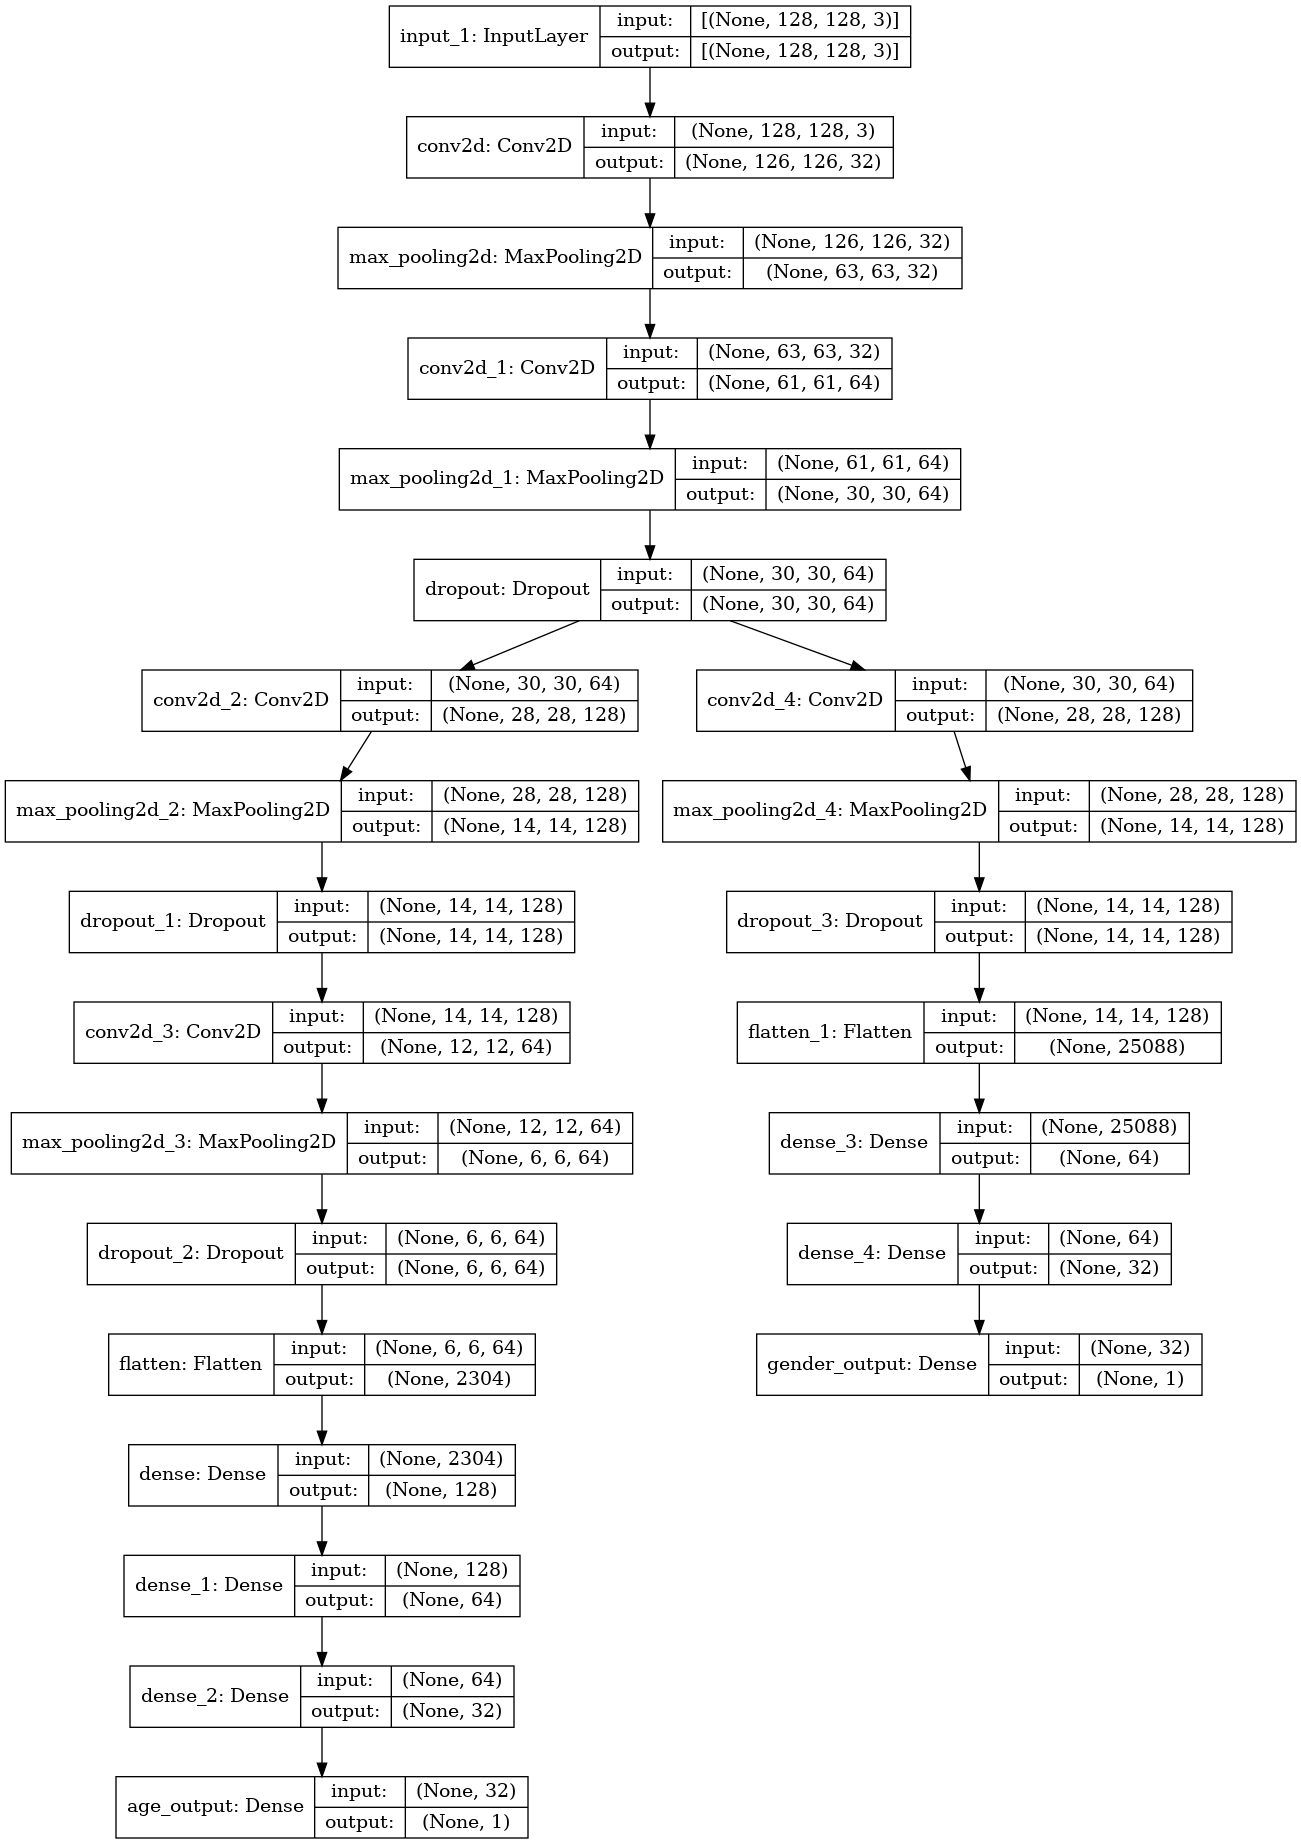

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [18]:
import tensorflow as tf
ckp_path="model_dump"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,
                                                   monitor="val_dense_4_mae",
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="auto")

In [19]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,
                                              monitor="val_dense_4_mae",
                                              mode="auto",
                                              cooldown=0,
                                              patience=5,
                                              varbose=1,
                                              min_lr=1e-5)

In [20]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

model.compile(loss={'age_output':'mse','gender_output':'binary_crossentropy'},
            optimizer='adam',
            metrics={'age_output':'mae','gender_output':'accuracy'})

In [104]:
history = model.fit(train_generator,
                    steps_per_epoch = n_train // batch_size, 
                    epochs=30,
                    batch_size = batch_size,
                    validation_data=val_generator,
                    validation_steps = n_val // batch_size,
                    callbacks = [model_checkpoint,earlystopping])

Epoch 1/30
296/296 [==============================] - 43s 144ms/step - loss: 52.9036 - age_output_loss: 52.8056 - gender_output_loss: 0.0981 - age_output_mae: 5.2944 - gender_output_accuracy: 0.9598 - val_loss: 66.3080 - val_age_output_loss: 66.0438 - val_gender_output_loss: 0.2642 - val_age_output_mae: 5.6555 - val_gender_output_accuracy: 0.9003
Epoch 2/30
296/296 [==============================] - 41s 139ms/step - loss: 53.1712 - age_output_loss: 53.0693 - gender_output_loss: 0.1019 - age_output_mae: 5.3350 - gender_output_accuracy: 0.9582 - val_loss: 66.8881 - val_age_output_loss: 66.6174 - val_gender_output_loss: 0.2708 - val_age_output_mae: 5.7544 - val_gender_output_accuracy: 0.8989
Epoch 3/30
296/296 [==============================] - 39s 133ms/step - loss: 51.7726 - age_output_loss: 51.6733 - gender_output_loss: 0.0993 - age_output_mae: 5.2641 - gender_output_accuracy: 0.9596 - val_loss: 94.7224 - val_age_output_loss: 94.4530 - val_gender_output_loss: 0.2695 - val_age_output_ma

Evaluate the performance

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)

fig.add_subplot(3,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(3,2,3)
plt.plot(history.history['age_output_loss'], label='train loss')
plt.plot(history.history['val_age_output_loss'], label='val loss')
plt.title('Age Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(3,2,4)
plt.plot(history.history['age_output_mae'], label='train mae')
plt.plot(history.history['val_age_output_mae'], label='val mae')
plt.title('Age MAE')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(3,2,5)
plt.plot(history.history['gender_output_loss'], label='train loss')
plt.plot(history.history['val_gender_output_loss'], label='val loss')
plt.title('Gender Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(3,2,6)
plt.plot(history.history['gender_output_accuracy'], label='train accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='val accuracy')
plt.title('Gender Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

In [28]:
prediction_val=model.predict(val_generator,batch_size)

In [159]:
count=0
for i in val_generator:
    print(i[0].shape)
    count+=1
    if count==1:
        break

(64, 128, 128, 3)


In [154]:
#At Zero index [0][n] predicted age
#at 1st index [1][n] predicted gender
prediction_val[0][5]

array([26.43608], dtype=float32)

In [155]:

converter = tf.lite.TFLiteConverter.from_keras_model( model )
converter.optimizations = [ tf.lite.Optimize.DEFAULT ]
converter.target_spec.supported_types = [ tf.float16 ]
buffer = converter.convert()

open( '{}_q.tflite'.format( 'quantized_model' ) , 'wb' ).write( buffer )


2022-06-18 14:03:54.401790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:03:54.402162: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-18 14:03:54.402319: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-18 14:03:54.402858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:03:54.403260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:03:54.403570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

4318560

In [102]:
import tensorflow as tf



# convert model into tensorflow lite model
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

#save model 
with open("model.tflite","wb") as f:
    f.write(tflite_model)



2022-06-18 13:11:53.062577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:11:53.062972: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-18 13:11:53.063101: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-18 13:11:53.063639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:11:53.064035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 13:11:53.064346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

In [103]:
model.load_weights("/model_dump")

In [36]:
model.save('/model_dump')


In [37]:
model.save_weights('/model_dump')

In [44]:
mydata='../input/working'
os.listdir(mydata)

['1XQxVBCb_400x400.jpg']

In [80]:
from PIL import Image
img=plt.imread(mydata+'/'+os.listdir(mydata)[0])
image2 = Image.open(mydata+'/'+os.listdir(mydata)[0])

In [89]:
resized_img=image2.resize((128,128))

In [92]:
type(resized_img)

PIL.Image.Image

In [96]:
img_np=np.array(resized_img)

In [97]:
img_np.shape

(128, 128, 3)

array([[582.864]], dtype=float32)

In [126]:
import cv2
im= cv2.imread(mydata+'/'+os.listdir(mydata)[0])
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [ ]:
imS = cv2.resize(im, (128, 128))
plt.imshow(imS)

In [ ]:
normal_img=(imS/255)
plt.imshow(normal_img)

In [178]:
x = np.expand_dims(normal_img, axis=0)
x.shape

(1, 128, 128, 3)

In [185]:
pred=model.predict(x)
if pred[1] >0.5:
    print('Gender: female, age: {}'.format(pred[0][0]))
else:
    print('Gender: Male, age: {}'.format(pred[0]))
    

Gender: female, age: [48.49582]


In [47]:
print(mydata+os.listdir(mydata)[0])

../input/working1XQxVBCb_400x400.jpg
